In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
busstop = pd.read_csv("../data/busstop_act.csv")

In [3]:
busstop.columns

Index(['정류장번호', '정류장명', '위도', '경도', '도시코드', '도시명', 'geometry', '이용량',
       '행정동_노인_생활인구수', '총인구수', '노인_인구수', '노인_이용량_비율', '노인_밀집도', '활용성'],
      dtype='object')

In [4]:
use_col = ['정류장번호', '정류장명', '위도', '경도', '도시코드', '도시명', 'geometry', '이용량', '행정동_노인_생활인구수', '총인구수', '노인_인구수', "활용성"]

In [5]:
busstop[use_col]

,정류장번호,정류장명,위도,경도,도시코드,도시명,geometry,이용량,행정동_노인_생활인구수,총인구수,노인_인구수,활용성
0,CWB379000566,구암고등학교,35.246296,128.593978,38010,경상남도 창원시,POINT (1099529.3099473445 1695090.3215359906),478654.0,410959,1003731,276574,0.010307
1,CWB379000567,사격장입구,35.244923,128.683156,38010,경상남도 창원시,POINT (1107644.8457543373 1695031.1020157929),464401.0,1934447,1003731,276574,0.047073
2,CWB379000568,장애인복지회관입구,35.244960,128.673597,38010,경상남도 창원시,POINT (1106775.0680812967 1695024.859684883),732161.0,1934447,1003731,276574,0.074214
3,CWB379000570,장애인복지회관입구,35.244773,128.673243,38010,경상남도 창원시,POINT (1106743.105090053 1695003.6802969584),266638.0,1934447,1003731,276574,0.027027
4,CWB379000573,지귀상가,35.244778,128.659437,38010,경상남도 창원시,POINT (1105486.9448440736 1694989.4555102403),1120637.0,1934447,1003731,276574,0.113591
...,...,...,...,...,...,...,...,...,...,...,...,...
19023,YSB5166,사과나무집,35.491970,128.989600,38100,경상남도 양산시,POINT (1135114.8887175242 1722807.740568875),3171.0,2291970,356268,90708,0.001073
19024,YSB5167,이지더원3차,35.322630,129.027700,38100,경상남도 양산시,POINT (1138861.2639738221 1704077.9474447218),147088.0,2291970,356268,90708,0.049768
19025,YSB5168,반도유보라6차,35.317890,129.027500,38100,경상남도 양산시,POINT (1138851.1887177934 1703551.928831223),147088.0,2291970,356268,90708,0.049768
19026,YSB5169,양우내안애6차,35.318010,129.023400,38100,경상남도 양산시,POINT (1138478.2608111338 1703559.5004212412),147088.0,2291970,356268,90708,0.049768


## 활용성 지수

In [6]:
busstop["활용성"]

0        0.010307
1        0.047073
2        0.074214
3        0.027027
4        0.113591
           ...   
19023    0.001073
19024    0.049768
19025    0.049768
19026    0.049768
19027    0.049768
Name: 활용성, Length: 19028, dtype: float64

In [7]:
import pickle
# with open("../data/거리계산/silver_dist_result_df.pkl", "rb") as f:
#     silver_dist = pickle.load(f)
# with open("../data/거리계산/silver_location_results.pkl", "rb") as f:
#     silver_loc = pickle.load(f)
    
with open("../data/거리계산/facility_dist_result_df.pkl", "rb") as f:
    facility_dist = pickle.load(f)
with open("../data/거리계산/facility_location_results.pkl", "rb") as f:
    facility_loc = pickle.load(f)

### 대중교통 이용 지수

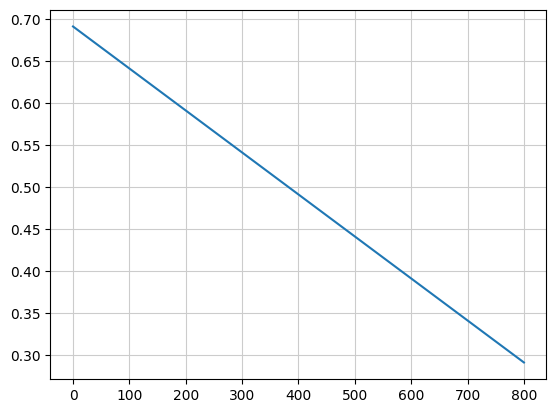

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 800, 0.01)
y = -0.0005 * x + 0.6913
plt.plot(x, y)
plt.grid(color="0.8")
plt.show()

In [9]:
facility_dist_m = facility_dist.copy()

In [10]:
facility_dist_m

,시설명,정류장1,정류장2,정류장3,정류장4,정류장5,정류장6,정류장7,정류장8,정류장9,정류장10
0,거제소방서,0.05226,0.05264,0.09737,0.09872,0.16442,0.20989,0.27355,0.28356,0.31996,0.36085
1,거창소방서,0.89842,0.90520,0.80260,0.81512,0.92931,0.94131,0.99580,0.97819,1.00680,0.99246
2,고성소방서,0.38742,0.66234,0.67034,0.77830,0.78534,0.89163,0.89953,1.06463,1.06824,1.05006
3,김해동부소방서,0.04891,0.14006,0.26468,0.24016,0.24521,0.27720,0.41858,0.55399,0.59256,0.60060
4,김해서부소방서,0.11327,0.11122,0.11531,0.12826,0.27943,0.30672,0.30570,0.35095,0.30961,0.38560
...,...,...,...,...,...,...,...,...,...,...,...
18446,장성중앙시장,0.26668,0.26574,0.42969,0.43670,0.91955,0.92856,0.79412,0.79928,0.95447,0.96641
18447,홍천시장,0.01958,0.03213,0.22983,0.23771,0.78291,0.78934,0.99128,1.00245,0.84606,0.85844
18448,제주시동문재래시장,0.08293,0.08733,0.19476,0.19731,0.30435,0.30813,0.34238,0.34684,0.50832,0.51171
18449,마천분회경로당,0.04434,0.04811,0.13948,0.14475,0.18469,0.23637,0.30860,0.31748,0.43108,0.43375


In [11]:
## 인덱스 시설명으로 설정
facility_dist_m = facility_dist_m.set_index("시설명")

## km에서 m로 변환
facility_dist_m = facility_dist_m*1000

## 800m 이하만 가져오기
facility_dist_m = facility_dist_m[facility_dist_m <= 800]

## 대중교통 이용 지수 설정
facility_dist_idx = facility_dist_m.applymap(lambda x: -0.0005 * x + 0.6913 if not pd.isnull(x) else np.nan)

In [12]:
facility_dist_idx

,정류장1,정류장2,정류장3,정류장4,정류장5,정류장6,정류장7,정류장8,정류장9,정류장10
시설명,,,,,,,,,,
거제소방서,0.665170,0.664980,0.642615,0.641940,0.609090,0.586355,0.554525,0.549520,0.531320,0.510875
거창소방서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
고성소방서,0.497590,0.360130,0.356130,0.302150,0.298630,NaN,NaN,NaN,NaN,NaN
김해동부소방서,0.666845,0.621270,0.558960,0.571220,0.568695,0.552700,0.482010,0.414305,0.395020,0.391000
김해서부소방서,0.634665,0.635690,0.633645,0.627170,0.551585,0.537940,0.538450,0.515825,0.536495,0.498500
...,...,...,...,...,...,...,...,...,...,...
장성중앙시장,0.557960,0.558430,0.476455,0.472950,NaN,NaN,0.294240,0.291660,NaN,NaN
홍천시장,0.681510,0.675235,0.576385,0.572445,0.299845,0.296630,NaN,NaN,NaN,NaN
제주시동문재래시장,0.649835,0.647635,0.593920,0.592645,0.539125,0.537235,0.520110,0.517880,0.437140,0.435445


### 활용성 지수

In [13]:
## 활용성 지수 설정
from tqdm import tqdm
act_list = []
for id in tqdm(facility_dist_m.index):
    act_list.append(pd.DataFrame(facility_loc[id])["활용성"].values)

100%|██████████| 18451/18451 [01:06<00:00, 278.30it/s]


In [14]:
facility_act_idx = pd.DataFrame(act_list, index=facility_dist_m.index, columns=facility_dist_m.columns)
facility_act_idx = facility_act_idx[~facility_dist_m.isna()]
facility_act_idx

,정류장1,정류장2,정류장3,정류장4,정류장5,정류장6,정류장7,정류장8,정류장9,정류장10
시설명,,,,,,,,,,
거제소방서,0.007185,0.012569,0.007240,0.011427,0.012569,0.008469,0.007185,0.012569,0.006684,0.013293
거창소방서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
고성소방서,0.304966,0.123346,0.129519,0.123346,0.129519,NaN,NaN,NaN,NaN,NaN
김해동부소방서,0.030626,0.030532,0.020464,0.030532,0.030532,0.000094,0.020464,0.020464,0.020464,0.054233
김해서부소방서,0.007206,0.007206,0.062265,0.061690,0.019182,0.007206,0.007206,0.026453,0.019182,0.026453
...,...,...,...,...,...,...,...,...,...,...
장성중앙시장,0.000051,0.000051,0.000051,0.000051,NaN,NaN,0.000051,0.000051,NaN,NaN
홍천시장,0.000975,0.000788,0.000975,0.000788,0.000368,0.000649,NaN,NaN,NaN,NaN
제주시동문재래시장,0.002282,0.002282,0.003541,0.003541,0.003541,0.003541,0.002282,0.002282,0.003541,0.003541


### 전체 지수

In [15]:
## 정류장 별 지수 곱하기
facility_total_idx = facility_act_idx * facility_dist_idx

## 정류장 별 지수 합치기
facility_total_idx["total_idx"] = facility_total_idx.apply(lambda x: x.sum(), axis=1)

In [17]:
facility_total_idx.to_csv("../data/facility_index.csv")